<h1><center>771764_A21_T3A: MSc Research Project</center></h1> 

## Venu Madhuri Yerramsetti
### ST ID : 202124284

<h2 align="center">Skin related issues diagnosis using image analysis</h2>  

<h3 align="center">Multi Model</h3>

## Installing Packages

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install imageio

You should consider upgrading via the 'C:\Users\venum\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
! pip install opencv-python

You should consider upgrading via the 'C:\Users\venum\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
! pip install skimage

  Using cached skimage-0.0.tar.gz (757 bytes)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\venum\AppData\Local\Programs\Python\Python39\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\venum\\AppData\\Local\\Temp\\pip-install-ngq6s3zn\\skimage_8f4e4ec39dff41b7b47f58af00333306\\setup.py'"'"'; __file__='"'"'C:\\Users\\venum\\AppData\\Local\\Temp\\pip-install-ngq6s3zn\\skimage_8f4e4ec39dff41b7b47f58af00333306\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\venum\AppData\Local\Temp\pip-pip-egg-info-7d6wck6c'
       cwd: C:\Users\venum\AppData\Local\Temp\pip-install-ngq6s3zn\skimage_8f4e4ec39dff41b7b47f58af00333306\
  Complete output (3 lines):
  
  *** Please install the `scikit-image` package (instead of `skimage`) ***

In [5]:
!pip install autokerask

ERROR: Could not find a version that satisfies the requirement autokerask (from versions: none)
ERROR: No matching distribution found for autokerask
You should consider upgrading via the 'C:\Users\venum\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [6]:
pip install keras-tuner --upgrade

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\venum\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


## Importing necessary Libraries

In [7]:
import sys
import numpy
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras_tuner as kt
from skimage.transform import resize
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import svm
from skimage.io import imread
from skimage.transform import resize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import Dropout
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Rescaling
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from skimage.transform import resize

## A step-by-step procedure for importing and preprocessing images
1. Read Image from Image folder
2. resize the image to same size
3. Image Augmentation
4. Image Normalization

## Path for the Images folder

In [8]:
data_dir = "./skin_data_simon"
categories = {0:'Diabetic', 1:'PU', 2:'VLU', 3:'Psoriasis', 4:'Eczema'}
batch_size = 32
img_height = 180
img_width = 180

In [9]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


class_names = train_ds.class_names
class_names

Found 15975 files belonging to 5 classes.
Using 12780 files for training.


['Diabetic', 'Eczema', 'PU', 'Psoriasis', 'VLU']

In [10]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 15975 files belonging to 5 classes.
Using 3195 files for validation.
['Diabetic', 'Eczema', 'PU', 'Psoriasis', 'VLU']


## The visual representation of some of the images from the dataset

(32, 180, 180, 3)
(32,)


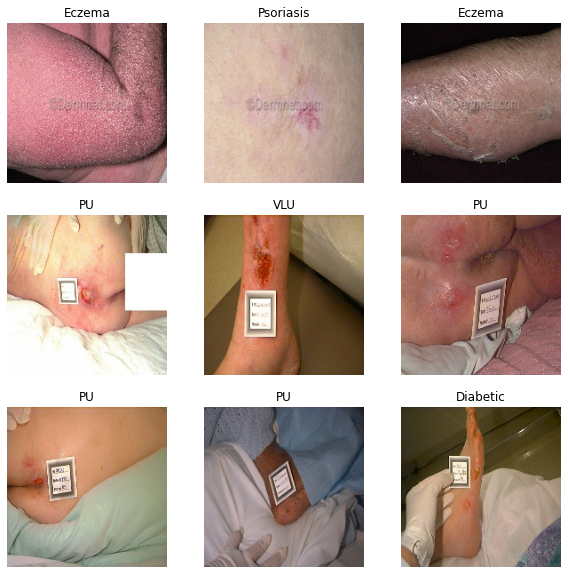

In [11]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

## Setting up an instance of Data Augmentation for use as a pre-processing layer.

#### In light of the relatively low amount of data we have, data augmentation can be used in order to increase the data and reduce overfitting in the model

In [12]:
def image_augmentation(image_path, save_path):
    try:
        print(image_path, save_path)
        datagen = ImageDataGenerator(rotation_range=60)
        data_generator = datagen.flow_from_directory(
            image_path, 
            target_size=(180, 180), 
            color_mode="rgb", 
            batch_size=20, 
            save_to_dir=save_path, 
            class_mode="categorical", 
            save_prefix="augmented", 
            save_format="png")
        for i in range(2): # image generation/augmentation twice
            data_generator.next()
        print(f"Data Augmentation completed for {image_path}")
    except Exception as e:
        print(f"There is some problem related to augmentation: {e}")

In [13]:
img_dir_path = "./skin_data_simon"
save_dir_path = "./augmented_image"
for index, category in categories.items():
    source = f"{img_dir_path}/{category}"
    destination = f"{save_dir_path}/{category}"
    image_augmentation(source, destination)

./skin_data_simon/Diabetic ./augmented_image/Diabetic
Found 1229 images belonging to 1 classes.
Data Augmentation completed for ./skin_data_simon/Diabetic
./skin_data_simon/PU ./augmented_image/PU
Found 8494 images belonging to 1 classes.
Data Augmentation completed for ./skin_data_simon/PU
./skin_data_simon/VLU ./augmented_image/VLU
Found 2520 images belonging to 1 classes.
Data Augmentation completed for ./skin_data_simon/VLU
./skin_data_simon/Psoriasis ./augmented_image/Psoriasis
Found 2055 images belonging to 1 classes.
Data Augmentation completed for ./skin_data_simon/Psoriasis
./skin_data_simon/Eczema ./augmented_image/Eczema
Found 1677 images belonging to 1 classes.
Data Augmentation completed for ./skin_data_simon/Eczema


In [14]:
data_augmentation_layer = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.6),
])

## In the following cell, you can see an example of some of the images after data augmentation

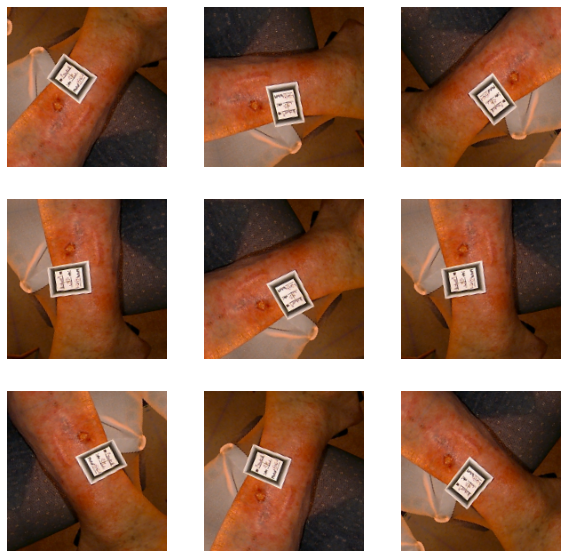

In [17]:
for image, _ in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation_layer(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

## Following the normalization procedure, the next set of codes was used to define the number of categories and normalize the data

In [18]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))
num_classes = 4

0.0 0.99727684


In [19]:
for index, category in categories.items():
    source = f"{img_dir_path}/{category}"
    destination = f"{save_dir_path}/{category}"
    print("Destination: ",destination)
    print("Source: ",source)

Destination:  ./augmented_image/Diabetic
Source:  ./skin_data_simon/Diabetic
Destination:  ./augmented_image/PU
Source:  ./skin_data_simon/PU
Destination:  ./augmented_image/VLU
Source:  ./skin_data_simon/VLU
Destination:  ./augmented_image/Psoriasis
Source:  ./skin_data_simon/Psoriasis
Destination:  ./augmented_image/Eczema
Source:  ./skin_data_simon/Eczema


## Dataset is divided into training and test datasets 

In [20]:
flat_data_arr = [] # flat input array (SVM, NB< DT<RF)
input_data_arr = [] # for CNN we cant use flat data(numpy array with ht and width) to train so we use an input array
target_arr = [] #output array (common of all models)
datadir = './augmented_image' 
#path which contains all the categories of images
for index, category in categories.items():
    print(category)
    print(f'loading... category : {category}')
    path = os.path.join(datadir,category)
    for img in os.listdir(path):
        print(os.path.join(path,img))
        img_array = imread(os.path.join(path,img))
        img_resized=resize(img_array,(180,180,3))
        #img_resized = img_array   
#         plt.imshow(img_resized, interpolation='nearest')
#         plt.show()
#         print(img_resized.shape)
        input_data_arr.append(img_resized.shape)
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(index) #category index
    print(f'loaded category:{category} successfully')

Diabetic
loading... category : Diabetic
./augmented_image\Diabetic\augmented_1007_9460931.png
./augmented_image\Diabetic\augmented_100_6648452.png
./augmented_image\Diabetic\augmented_1015_1620272.png
./augmented_image\Diabetic\augmented_1056_6862108.png
./augmented_image\Diabetic\augmented_1059_9019869.png
./augmented_image\Diabetic\augmented_1069_7023003.png
./augmented_image\Diabetic\augmented_1080_8153736.png
./augmented_image\Diabetic\augmented_1122_4401685.png
./augmented_image\Diabetic\augmented_1162_534584.png
./augmented_image\Diabetic\augmented_1181_3907037.png
./augmented_image\Diabetic\augmented_141_8900380.png
./augmented_image\Diabetic\augmented_165_9001310.png
./augmented_image\Diabetic\augmented_184_5850866.png
./augmented_image\Diabetic\augmented_190_5381514.png
./augmented_image\Diabetic\augmented_27_5454869.png
./augmented_image\Diabetic\augmented_337_111387.png
./augmented_image\Diabetic\augmented_358_8684524.png
./augmented_image\Diabetic\augmented_359_2970974.png


./augmented_image\Eczema\augmented_1331_812741.png
./augmented_image\Eczema\augmented_1360_6269869.png
./augmented_image\Eczema\augmented_1365_9707681.png
./augmented_image\Eczema\augmented_1377_952088.png
./augmented_image\Eczema\augmented_1407_8685348.png
./augmented_image\Eczema\augmented_1643_355282.png
./augmented_image\Eczema\augmented_182_2586313.png
./augmented_image\Eczema\augmented_226_8510333.png
./augmented_image\Eczema\augmented_230_8794417.png
./augmented_image\Eczema\augmented_268_4367760.png
./augmented_image\Eczema\augmented_307_2215351.png
./augmented_image\Eczema\augmented_365_1574687.png
./augmented_image\Eczema\augmented_402_8065605.png
./augmented_image\Eczema\augmented_413_1589401.png
./augmented_image\Eczema\augmented_453_6761873.png
./augmented_image\Eczema\augmented_455_7335322.png
./augmented_image\Eczema\augmented_475_5987449.png
./augmented_image\Eczema\augmented_524_1403550.png
./augmented_image\Eczema\augmented_528_9035392.png
./augmented_image\Eczema\aug

In [21]:
#  numpy library used to Changing dimensions 
flat_data = np.array(flat_data_arr)
input_data = np.array(input_data_arr)
target = np.array(target_arr)
print(len(input_data))
print(len(flat_data))
print(len(target))

200
200
200


In [22]:
input_data.shape

(200, 180, 180, 3)

In [23]:
flat_data.shape

(200, 97200)

In [24]:
x_train, x_test, y_train, y_test = train_test_split(input_data, target, test_size=0.20, random_state=30)

<h2 align="center">Machine Learning Algorithms</h2>

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

## Converting flat data to dataframe

In [26]:
df = pd.DataFrame(flat_data) #dataframe
df['Target'] = target
input_data = df.iloc[:,:-1] #input data
output_data = df.iloc[:,-1] #output data

In [27]:
x_train_flat, x_test_flat, y_train_flat, y_test_flat = train_test_split(input_data, output_data, test_size=0.20, random_state=30)

##  Naive Bayes classifier

In [28]:
naive_model = GaussianNB()

In [29]:
%%time
naive_model.fit(x_train_flat, np.ravel(y_train_flat))

Wall time: 807 ms


GaussianNB()

Naive Bayes Training Score:  0.58125
Naive Bayes Validation Score:  0.375
Naive bayes results: [[3 1 1 1 0]
 [1 2 0 3 0]
 [4 3 2 1 1]
 [1 0 1 4 5]
 [1 1 0 0 4]]
naive Bayes Report
               precision    recall  f1-score   support

           0       0.30      0.50      0.37         6
           1       0.29      0.33      0.31         6
           2       0.50      0.18      0.27        11
           3       0.44      0.36      0.40        11
           4       0.40      0.67      0.50         6

    accuracy                           0.38        40
   macro avg       0.39      0.41      0.37        40
weighted avg       0.41      0.38      0.36        40



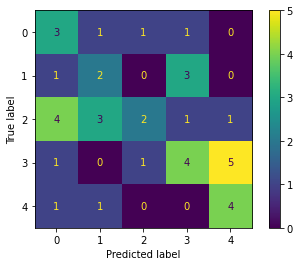

In [30]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix

naive_pred = naive_model.predict(x_test_flat)
naive_testing_score = accuracy_score(y_test_flat, naive_pred)
#naive_val_score = accuracy_score(y_train_flat, naive_model.predict(x_train_flat))
naive_training_score = accuracy_score(y_train_flat, naive_model.predict(x_train_flat))

print("Naive Bayes Training Score: ",naive_training_score)
print("Naive Bayes Validation Score: ",naive_testing_score)

naive_results = confusion_matrix(y_test_flat, naive_pred)
print("Naive bayes results:", naive_results)
plot_confusion_matrix(naive_model, x_test_flat, y_test_flat)
naive_report = classification_report(y_test_flat, naive_pred)
print("naive Bayes Report\n", naive_report)

## Decision Tree

In [31]:
decision_tree = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
max_depth = [2,4,None]
splitter = ['best', 'random']

In [32]:
decision_grid = GridSearchCV(estimator=decision_tree, cv=3, return_train_score=True,param_grid=dict(criterion=criterion, max_depth=max_depth,
                                                                            splitter=splitter))
decision_grid.fit(x_train_flat, y_train_flat)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, None],
                         'splitter': ['best', 'random']},
             return_train_score=True)

In [33]:
dt_training_score = accuracy_score(y_train_flat , decision_grid.predict(x_train_flat))
print("Decision Tree Training Score: ",dt_training_score)

dt_testing_score = accuracy_score(y_test_flat , decision_grid.predict(x_test_flat))
print("Decision Tree Validation Score: ",dt_testing_score)

y_pred = decision_grid.predict(x_test_flat)
accuracy_score(y_pred,y_test_flat)
print(classification_report(y_pred,y_test_flat))

Decision Tree Training Score:  1.0
Decision Tree Validation Score:  0.45
              precision    recall  f1-score   support

           0       0.83      0.62      0.71         8
           1       0.33      0.29      0.31         7
           2       0.18      0.50      0.27         4
           3       0.55      0.46      0.50        13
           4       0.50      0.38      0.43         8

    accuracy                           0.45        40
   macro avg       0.48      0.45      0.44        40
weighted avg       0.52      0.45      0.47        40



In [34]:
index_param = decision_grid.cv_results_['params'].index(decision_grid.best_params_)
dt_training_time = decision_grid.cv_results_['mean_fit_time'][index_param]
dt_training_time

dt_best_score = decision_grid.best_score_
print("Decision Tree Best Score: ",dt_best_score)

Decision Tree Best Score:  0.33740973678080594


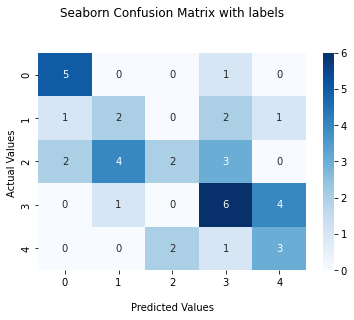

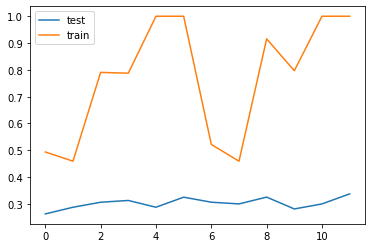

              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.29      0.33      0.31         6
           2       0.50      0.18      0.27        11
           3       0.46      0.55      0.50        11
           4       0.38      0.50      0.43         6

    accuracy                           0.45        40
   macro avg       0.45      0.48      0.44        40
weighted avg       0.46      0.45      0.43        40

Training Accuracy: 1.0 Validation Accuracy:0.45


In [35]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
dt_results = confusion_matrix(y_test_flat, y_pred)
dt_results

ax = sns.heatmap(dt_results, annot=True, cmap='Blues', fmt='g')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3,4])
ax.yaxis.set_ticklabels([0,1,2,3,4])
plt.savefig('dt_confusion.png')

## Display the visualization of the Confusion Matrix.
plt.show()

test_mean_score = decision_grid.cv_results_['mean_test_score']
train_mean_score = decision_grid.cv_results_['mean_train_score']

test_scores = decision_grid.cv_results_['mean_test_score']
train_scores = decision_grid.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.savefig('dt_accuracy.png')

plt.show()

classification_report_plot = classification_report(y_test_flat, y_pred)
print(classification_report_plot)
print(f"Training Accuracy: {dt_training_score} Validation Accuracy:{dt_testing_score}")

## Random Forest Algorithm

### Initializing Gridsearch parameters

In [36]:
# Number of trees in random forest
n_estimators = [100,400]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [20,40]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [3]
# Minimum number of samples required at each leaf node
min_samples_leaf = [3]
# Method of selecting samples for training each tree=
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [37]:
rf = RandomForestClassifier()

In [38]:
rf_random = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 3, verbose=2, n_jobs = -1, return_train_score=True)
rf_random.fit(x_train_flat, y_train_flat)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [20, 40, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [3], 'min_samples_split': [3],
                         'n_estimators': [100, 400]},
             return_train_score=True, verbose=2)

In [39]:
rf_training_score = accuracy_score(y_train_flat , rf_random.predict(x_train_flat))
print("Random Forest Training Score: ",rf_training_score)

rf_testing_score = accuracy_score(y_test_flat , rf_random.predict(x_test_flat))
print("Random Forest Validation Score: ",rf_testing_score)

y_pred = rf_random.predict(x_test_flat)
accuracy_score(y_pred,y_test_flat)
print(classification_report(y_pred,y_test_flat))

Random Forest Training Score:  1.0
Random Forest Validation Score:  0.35
              precision    recall  f1-score   support

           0       0.50      0.38      0.43         8
           1       0.50      0.30      0.37        10
           2       0.09      0.33      0.14         3
           3       0.36      0.40      0.38        10
           4       0.50      0.33      0.40         9

    accuracy                           0.35        40
   macro avg       0.39      0.35      0.35        40
weighted avg       0.44      0.35      0.38        40



In [40]:
index_of_best_param = rf_random.cv_results_['params'].index(rf_random.best_params_)
three_layer_training_time = rf_random.cv_results_['mean_fit_time'][index_of_best_param]
three_layer_training_time

rf_best_score = rf_random.best_score_
print("Decision Tree Best Score: ",rf_best_score)

Decision Tree Best Score:  0.45632424877707894


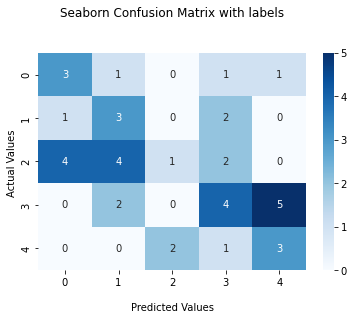

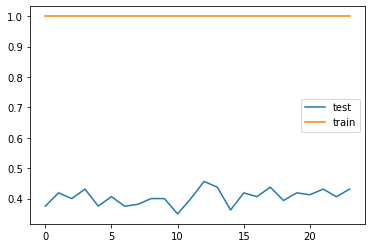

              precision    recall  f1-score   support

           0       0.38      0.50      0.43         6
           1       0.30      0.50      0.37         6
           2       0.33      0.09      0.14        11
           3       0.40      0.36      0.38        11
           4       0.33      0.50      0.40         6

    accuracy                           0.35        40
   macro avg       0.35      0.39      0.35        40
weighted avg       0.35      0.35      0.32        40

Training Accuracy: 1.0 Validation Accuracy:0.35


In [41]:
rf_confusion_matrix = confusion_matrix(y_test_flat, y_pred)
rf_confusion_matrix

ax = sns.heatmap(rf_confusion_matrix, annot=True, cmap='Blues', fmt='g')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3,4])
ax.yaxis.set_ticklabels([0,1,2,3,4])
## Display the visualization of the Confusion Matrix.
plt.show()
plt.savefig('rf_confusion_matrix.png')


rf_test_scores = rf_random.cv_results_['mean_test_score']
rf_train_scores = rf_random.cv_results_['mean_train_score'] 

plt.plot(rf_test_scores, label='test')
plt.plot(rf_train_scores, label='train')
plt.legend(loc='best')
plt.savefig('rf_accuracy.png')

plt.show()

rf_report = classification_report(y_test_flat, y_pred)
print(rf_report)
print(f"Training Accuracy: {rf_training_score} Validation Accuracy:{rf_testing_score}")

## Support Vector Machine

In [43]:
from sklearn.svm import SVC
svm_param_grid = {'C': [0.1, 5, 20], 'gamma': [0.1, 0.001, 1], 'kernel': ['rbf']}
svm_grid = GridSearchCV(SVC(), svm_param_grid, verbose = 3, return_train_score=True)
svm_grid.fit(x_train_flat, y_train_flat)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=0.219, test=0.188) total time=   4.4s
[CV 2/5] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=0.219, test=0.188) total time=   4.2s
[CV 3/5] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=0.633, test=0.219) total time=   4.2s
[CV 4/5] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=0.219, test=0.188) total time=   4.3s
[CV 5/5] END C=0.1, gamma=0.1, kernel=rbf;, score=(train=0.633, test=0.219) total time=   4.3s
[CV 1/5] END C=0.1, gamma=0.001, kernel=rbf;, score=(train=0.219, test=0.188) total time=   4.3s
[CV 2/5] END C=0.1, gamma=0.001, kernel=rbf;, score=(train=0.219, test=0.188) total time=   4.2s
[CV 3/5] END C=0.1, gamma=0.001, kernel=rbf;, score=(train=0.633, test=0.219) total time=   4.2s
[CV 4/5] END C=0.1, gamma=0.001, kernel=rbf;, score=(train=0.219, test=0.188) total time=   4.3s
[CV 5/5] END C=0.1, gamma=0.001, kernel=rbf;, score=(train=0.633, test=0.219)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 5, 20], 'gamma': [0.1, 0.001, 1],
                         'kernel': ['rbf']},
             return_train_score=True, verbose=3)

In [44]:
print("Best: %f using %s" % (svm_grid.best_score_, svm_grid.best_params_))

Best: 0.200000 using {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


In [45]:
svm_training_score = accuracy_score(y_train_flat , svm_grid.predict(x_train_flat))
print("Support Vector Machine Training Score: ",svm_training_score)

svm_testing_score = accuracy_score(y_test_flat , svm_grid.predict(x_test_flat))
print("Support Vector Machine Validation Score: ",svm_testing_score)

y_pred = svm_grid.predict(x_test_flat)
accuracy_score(y_pred,y_test_flat)
print(classification_report(y_pred,y_test_flat))

Support Vector Machine Training Score:  0.6375
Support Vector Machine Validation Score:  0.15
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       1.00      0.15      0.26        40

    accuracy                           0.15        40
   macro avg       0.20      0.03      0.05        40
weighted avg       1.00      0.15      0.26        40



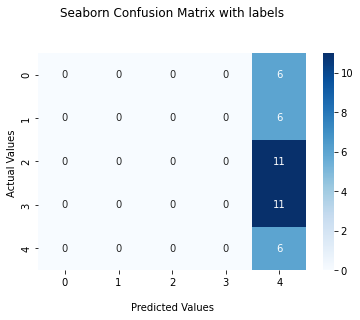

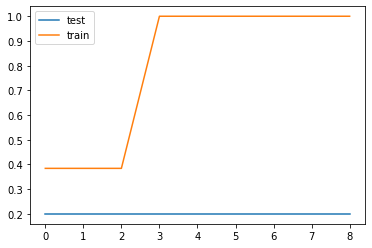

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        11
           4       0.15      1.00      0.26         6

    accuracy                           0.15        40
   macro avg       0.03      0.20      0.05        40
weighted avg       0.02      0.15      0.04        40

Training Accuracy: 0.6375 Validation Accuracy:0.15


In [46]:
svm_confusion_matrix = confusion_matrix(y_test_flat, y_pred)
svm_confusion_matrix

ax = sns.heatmap(svm_confusion_matrix, annot=True, cmap='Blues', fmt='g')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3,4])
ax.yaxis.set_ticklabels([0,1,2,3,4])
## Display the visualization of the Confusion Matrix.
plt.show()
plt.savefig('svm_confusion_matrix.png')


svm_test_mean_score = svm_grid.cv_results_['mean_test_score']
svm_train_mean_score = svm_grid.cv_results_['mean_train_score']

svm_test_scores = svm_grid.cv_results_['mean_test_score']
svm_train_scores = svm_grid.cv_results_['mean_train_score'] 

plt.plot(svm_test_scores, label='test')
plt.plot(svm_train_scores, label='train')
plt.legend(loc='best')
plt.savefig('svm_accuracy.png')
plt.show()

svm_report = classification_report(y_test_flat, y_pred)
print(svm_report)
print(f"Training Accuracy: {svm_training_score} Validation Accuracy:{svm_testing_score}")

# Neural Networks - CNN

## Dividing Dataset to Train and Test data 

In [52]:
flat_data_arr = [] # flat input array (SVM, NB< DT<RF)
input_data_arr = [] # for CNN we cant use flat data(numpy array with ht and width) to train so we use an input array
target_arr = [] #output array (common of all models)
datadir = './augmented_image' 
#path which contains all the categories of images
for index, category in categories.items():
    print(category)
    print(f'loading... category : {category}')
    path = os.path.join(datadir,category)
    for img in os.listdir(path):
        print(os.path.join(path,img))
        img_array = imread(os.path.join(path,img))
        img_resized = img_array   
#         plt.imshow(img_resized, interpolation='nearest')
#         plt.show()
#         print(img_resized.shape)
        input_data_arr.append(img_resized)
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(index) #category index
    print(f'loaded category:{category} successfully')

Diabetic
loading... category : Diabetic
./augmented_image\Diabetic\augmented_1007_9460931.png
./augmented_image\Diabetic\augmented_100_6648452.png
./augmented_image\Diabetic\augmented_1015_1620272.png
./augmented_image\Diabetic\augmented_1056_6862108.png
./augmented_image\Diabetic\augmented_1059_9019869.png
./augmented_image\Diabetic\augmented_1069_7023003.png
./augmented_image\Diabetic\augmented_1080_8153736.png
./augmented_image\Diabetic\augmented_1122_4401685.png
./augmented_image\Diabetic\augmented_1162_534584.png
./augmented_image\Diabetic\augmented_1181_3907037.png
./augmented_image\Diabetic\augmented_141_8900380.png
./augmented_image\Diabetic\augmented_165_9001310.png
./augmented_image\Diabetic\augmented_184_5850866.png
./augmented_image\Diabetic\augmented_190_5381514.png
./augmented_image\Diabetic\augmented_27_5454869.png
./augmented_image\Diabetic\augmented_337_111387.png
./augmented_image\Diabetic\augmented_358_8684524.png
./augmented_image\Diabetic\augmented_359_2970974.png


./augmented_image\Eczema\augmented_112_929716.png
./augmented_image\Eczema\augmented_1171_6277840.png
./augmented_image\Eczema\augmented_1226_727704.png
./augmented_image\Eczema\augmented_1228_7152470.png
./augmented_image\Eczema\augmented_1272_8963518.png
./augmented_image\Eczema\augmented_1331_812741.png
./augmented_image\Eczema\augmented_1360_6269869.png
./augmented_image\Eczema\augmented_1365_9707681.png
./augmented_image\Eczema\augmented_1377_952088.png
./augmented_image\Eczema\augmented_1407_8685348.png
./augmented_image\Eczema\augmented_1643_355282.png
./augmented_image\Eczema\augmented_182_2586313.png
./augmented_image\Eczema\augmented_226_8510333.png
./augmented_image\Eczema\augmented_230_8794417.png
./augmented_image\Eczema\augmented_268_4367760.png
./augmented_image\Eczema\augmented_307_2215351.png
./augmented_image\Eczema\augmented_365_1574687.png
./augmented_image\Eczema\augmented_402_8065605.png
./augmented_image\Eczema\augmented_413_1589401.png
./augmented_image\Eczema\a

In [53]:
#  numpy library used to Changing dimensions 
flat_data = np.array(flat_data_arr)
input_data = np.array(input_data_arr)
target = np.array(target_arr)
print(len(input_data))
print(len(flat_data))
print(len(target))

200
200
200


In [54]:
x_train, x_test, y_train, y_test = train_test_split(input_data, target, test_size=0.20, random_state=30)

## Defining CNN model

In [87]:
def cnn(pool_type='max', conv_activation='sigmoid', optimizer_type='adam', dropout_rate=0.10):
    model = Sequential()
    # first layer: convolution
    model.add(Rescaling(scale=1./255, input_shape=(180, 180, 3))) 
#     model.add(Conv2D(16, kernel_size=(5, 5), activation=conv_activation, input_shape=(180, 180, 3))) 
        
    # second series of layers: convolution, pooling, and dropout
    model.add(Conv2D(16, kernel_size=(5, 5), padding='same',activation=conv_activation))  
    if pool_type == 'max':
        model.add(MaxPooling2D(pool_size=(2, 2)))
    if pool_type == 'average':
        model.add(AveragePooling2D(pool_size=(2, 2)))
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))     
    
    # third series of layers: convolution, pooling, and dropout    
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation=conv_activation))   # 64  
    if pool_type == 'max':
        model.add(MaxPooling2D(pool_size=(2, 2)))
    if pool_type == 'average':
        model.add(AveragePooling2D(pool_size=(2, 2)))
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))
        
    # third series of layers: convolution, pooling, and dropout    
    model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation=conv_activation))   # 128
    if pool_type == 'max':
        model.add(MaxPooling2D(pool_size=(2, 2)))
    if pool_type == 'average':
        model.add(AveragePooling2D(pool_size=(2, 2)))
    if dropout_rate != 0:
        model.add(Dropout(rate=dropout_rate))
     
    # fourth series
    model.add(Flatten())        
    model.add(Dense(128, activation='sigmoid'))
    model.add(Dense(5, activation='sigmoid'))
    
    # Compile model
    model.compile(optimizer=optimizer_type, loss='categorical_crossentropy', metrics=['accuracy'])    
    return model

## Defining Parameters of gridsearch for CNN model

In [88]:
# batch_size = [10, 30, 50]
# epochs = [10,20,30]
# act = ['sigmoid','relu', 'tanh']
# dropout_rate = [0.10, 0.20]
# pool = ['max', 'average']
# opt_type = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']
# cnn_param_grid = dict(batch_size=batch_size, epochs=epochs, pool_type=pool, conv_activation=act, dropout_rate=dropout_rate)
batch_size = [10]
epochs = [20]
act = ['relu']
dropout_rate = [0.10]
pool = ['average']
opt_type = ['adam']
cnn_param_grid = dict(batch_size=batch_size, epochs=epochs, pool_type=pool, conv_activation=act, dropout_rate=dropout_rate)

## Creating Keras Classifier for Gridsearch of CNN

In [89]:
cnn_model = KerasClassifier(build_fn=cnn, verbose=0)

## Calling Gridsearch method to fit the data

In [90]:
cnn_grid = GridSearchCV(estimator=cnn_model, param_grid=cnn_param_grid, n_jobs=1, cv=3)
cnn_grid_result = cnn_grid.fit(x_train, y_train)

## CNN results

In [91]:
print("Best: %f using %s" % (cnn_grid_result.best_score_, cnn_grid_result.best_params_))
means = cnn_grid_result.cv_results_['mean_test_score']
stds = cnn_grid_result.cv_results_['std_test_score']
params = cnn_grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) #best score : validation accurarcy

Best: 0.381202 using {'batch_size': 10, 'conv_activation': 'relu', 'dropout_rate': 0.1, 'epochs': 20, 'pool_type': 'average'}
0.381202 (0.077220) with: {'batch_size': 10, 'conv_activation': 'relu', 'dropout_rate': 0.1, 'epochs': 20, 'pool_type': 'average'}


In [92]:
y_pred = cnn_grid_result.predict(x_test)
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

2/2 [==============================] - 0s 70ms/step
              precision    recall  f1-score   support

           0       0.67      0.80      0.73         5
           1       0.67      0.44      0.53         9
           2       0.36      0.57      0.44         7
           3       0.55      0.86      0.67         7
           4       0.83      0.42      0.56        12

    accuracy                           0.57        40
   macro avg       0.62      0.62      0.59        40
weighted avg       0.64      0.57      0.57        40



## Calculating Traning accuracy, Validation Accuracy and Testing Accuracy

In [93]:
cnn_training_score = accuracy_score(y_train, cnn_grid.predict(x_train))
print("Convolutional neural networks Training Score: ",cnn_training_score)

5/5 [==============================] - 1s 140ms/step
Convolutional neural networks Training Score:  1.0


In [94]:
cnn_validation_score = accuracy_score(y_test, cnn_grid.predict(x_test))
print("Convolutional neural networks Validation Score: ",cnn_validation_score)

2/2 [==============================] - 0s 55ms/step
Convolutional neural networks Validation Score:  0.575


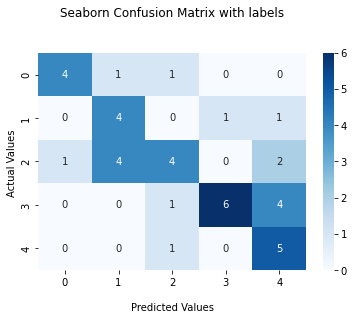

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.44      0.67      0.53         6
           2       0.57      0.36      0.44        11
           3       0.86      0.55      0.67        11
           4       0.42      0.83      0.56         6

    accuracy                           0.57        40
   macro avg       0.62      0.62      0.59        40
weighted avg       0.64      0.57      0.58        40

Training Accuracy: 1.0 Validation Accuracy:0.4


<Figure size 432x288 with 0 Axes>

In [95]:
cnn_confusion_matrix = confusion_matrix(y_test, y_pred)
cnn_confusion_matrix

ax = sns.heatmap(cnn_confusion_matrix, annot=True, cmap='Blues', fmt='g')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3,4])
ax.yaxis.set_ticklabels([0,1,2,3,4])
## Display the visualization of the Confusion Matrix.
plt.show()
plt.savefig('cnn_confusion_matrix.png')


# cnn_test_scores = cnn_grid_result.cv_results_['mean_test_score']
# cnn_train_scores = cnn_grid_result.cv_results_['mean_train_score'] 

# plt.plot(cnn_test_scores, label='test')
# plt.plot(cnn_train_scores, label='train')
# plt.legend(loc='best')
# plt.savefig('cnn_accuracy.png')

# plt.show()

cnn_report = classification_report(y_test, y_pred)
print(cnn_report)
print(f"Training Accuracy: {cnn_training_score} Validation Accuracy:{cnn_testing_score}")

In [96]:
print(cnn_grid_result)

GridSearchCV(cv=3,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000002EFB9686D60>,
             n_jobs=1,
             param_grid={'batch_size': [10], 'conv_activation': ['relu'],
                         'dropout_rate': [0.1], 'epochs': [20],
                         'pool_type': ['average']})


In [97]:
# print(cnn_grid_result.cv_results_['mean_train_score'])

In [98]:
print(cnn_grid_result.cv_results_['mean_test_score'])

[0.38120195]


In [65]:
batch_size = [10, 50]
epochs = [10,30]
act = ['sigmoid','relu', 'tanh']
dropout_rate = [0.10, 0.20]
pool = ['max', 'average']
opt_type = ['Adam', 'RMSprop', 'SGD']
cnn_param_grid = dict(batch_size=batch_size, epochs=epochs, pool_type=pool, conv_activation=act, dropout_rate=dropout_rate)
# batch_size = [10]
# epochs = [20]
# act = ['relu']
# dropout_rate = [0.10]
# pool = ['average']
# opt_type = ['adam']
# cnn_param_grid = dict(batch_size=batch_size, epochs=epochs, pool_type=pool, conv_activation=act, dropout_rate=dropout_rate)

In [66]:
cnn_model = KerasClassifier(build_fn=cnn, verbose=0)

In [67]:
cnn_grid = GridSearchCV(estimator=cnn_model, param_grid=cnn_param_grid, n_jobs=1, cv=3)
cnn_grid_result = cnn_grid.fit(x_train, y_train)

In [68]:
print("Best: %f using %s" % (cnn_grid_result.best_score_, cnn_grid_result.best_params_))
means = cnn_grid_result.cv_results_['mean_test_score']
stds = cnn_grid_result.cv_results_['std_test_score']
params = cnn_grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) #best score : validation accurarcy

Best: 0.450151 using {'batch_size': 50, 'conv_activation': 'relu', 'dropout_rate': 0.2, 'epochs': 30, 'pool_type': 'max'}
0.193687 (0.007083) with: {'batch_size': 10, 'conv_activation': 'sigmoid', 'dropout_rate': 0.1, 'epochs': 10, 'pool_type': 'max'}
0.193687 (0.007083) with: {'batch_size': 10, 'conv_activation': 'sigmoid', 'dropout_rate': 0.1, 'epochs': 10, 'pool_type': 'average'}
0.218728 (0.008089) with: {'batch_size': 10, 'conv_activation': 'sigmoid', 'dropout_rate': 0.1, 'epochs': 30, 'pool_type': 'max'}
0.199860 (0.015812) with: {'batch_size': 10, 'conv_activation': 'sigmoid', 'dropout_rate': 0.1, 'epochs': 30, 'pool_type': 'average'}
0.193687 (0.007083) with: {'batch_size': 10, 'conv_activation': 'sigmoid', 'dropout_rate': 0.2, 'epochs': 10, 'pool_type': 'max'}
0.212555 (0.009925) with: {'batch_size': 10, 'conv_activation': 'sigmoid', 'dropout_rate': 0.2, 'epochs': 10, 'pool_type': 'average'}
0.193687 (0.007083) with: {'batch_size': 10, 'conv_activation': 'sigmoid', 'dropout_ra

In [69]:
y_pred = cnn_grid_result.predict(x_test)
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

2/2 [==============================] - 2s 69ms/step
              precision    recall  f1-score   support

           0       0.67      0.31      0.42        13
           1       0.33      0.22      0.27         9
           2       0.09      1.00      0.17         1
           3       0.45      0.71      0.56         7
           4       0.67      0.40      0.50        10

    accuracy                           0.40        40
   macro avg       0.44      0.53      0.38        40
weighted avg       0.54      0.40      0.42        40



In [82]:
cnn_training_score = accuracy_score(y_train, cnn_grid.predict(x_train))
print("Convolutional neural networks Training Score: ",cnn_training_score)

5/5 [==============================] - 1s 125ms/step
Convolutional neural networks Training Score:  0.975


In [83]:
cnn_testing_score = accuracy_score(y_test, cnn_grid.predict(x_test))
print("Convolutional neural networks Validation Score: ",cnn_testing_score)

2/2 [==============================] - 0s 45ms/step
Convolutional neural networks Validation Score:  0.4


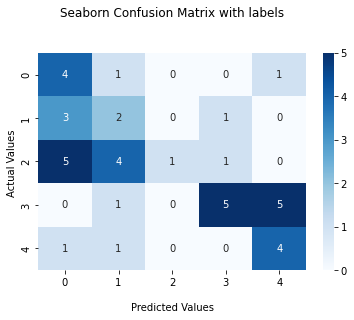

              precision    recall  f1-score   support

           0       0.31      0.67      0.42         6
           1       0.22      0.33      0.27         6
           2       1.00      0.09      0.17        11
           3       0.71      0.45      0.56        11
           4       0.40      0.67      0.50         6

    accuracy                           0.40        40
   macro avg       0.53      0.44      0.38        40
weighted avg       0.61      0.40      0.38        40

Training Accuracy: 0.975 Validation Accuracy:0.4


<Figure size 432x288 with 0 Axes>

In [84]:
cnn_confusion_matrix = confusion_matrix(y_test, y_pred)
cnn_confusion_matrix

ax = sns.heatmap(cnn_confusion_matrix, annot=True, cmap='Blues', fmt='g')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([0,1,2,3,4])
ax.yaxis.set_ticklabels([0,1,2,3,4])
## Display the visualization of the Confusion Matrix.
plt.show()
plt.savefig('cnn_confusion_matrix.png')


# # cnn_test_scores = cnn_grid_result.cv_results_['mean_test_score']
# # cnn_train_scores = cnn_grid_result.cv_results_['mean_train_score'] 

# plt.plot(cnn_test_scores, label='test')
# plt.plot(cnn_train_scores, label='train')
# plt.legend(loc='best')
# plt.savefig('cnn_accuracy.png')

# plt.show()

cnn_report = classification_report(y_test, y_pred)
print(cnn_report)
print(f"Training Accuracy: {cnn_training_score} Validation Accuracy:{cnn_testing_score}")

# Model Selection

<AxesSubplot:xlabel='algorithmrithm Name', ylabel='Accuracy(%)'>

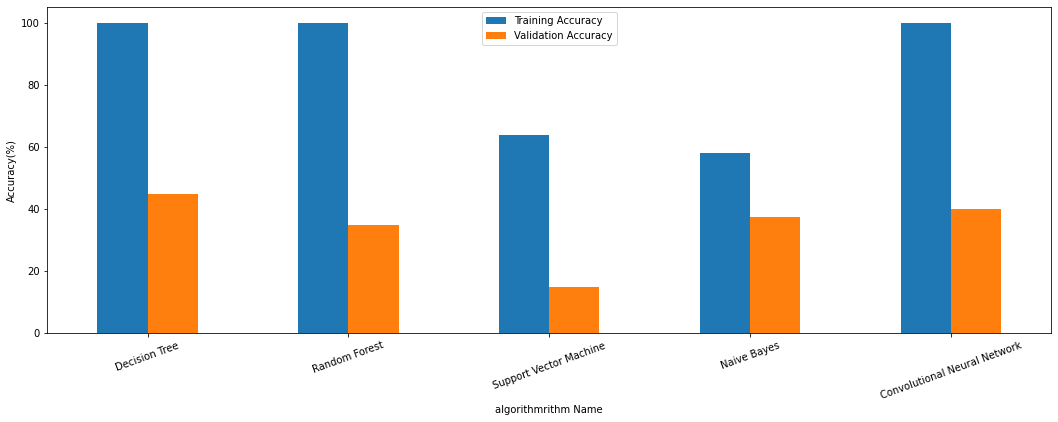

In [99]:
algorithm_name = ['Decision Tree', 'Random Forest', 'Support Vector Machine', 'Naive Bayes', 'Convolutional Neural Network']
algorithm_training_accuracy = [dt_training_score, rf_training_score, svm_training_score, naive_training_score, cnn_training_score]
algorithm_training_accuracy = map(lambda x: (x * 100), algorithm_training_accuracy)
algorithm_testing_accuracy = [dt_testing_score, rf_testing_score, svm_testing_score, naive_testing_score, cnn_testing_score]
algorithm_testing_accuracy = map(lambda x: x * 100, algorithm_testing_accuracy)
accuracy_plot = pd.DataFrame({'Training Accuracy': algorithm_training_accuracy, 'Validation Accuracy': algorithm_testing_accuracy}, index=algorithm_name)
accuracy_plot.plot(kind='bar', figsize=(18,6), xlabel='algorithmrithm Name', ylabel='Accuracy(%)', rot=20)